In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data_path = 'retail_sales_dataset.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

Dataset Overview:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [5]:
# Step 2: Data Cleaning
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Dropping duplicates if any
df = df.drop_duplicates()

# Fill or drop missing values (example: fill missing numerical values with mean)
for column in df.select_dtypes(include=['float64', 'int64']):
    df[column].fillna(df[column].mean(), inplace=True)


Missing Values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Number of duplicate rows: 0


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_12352\1199021487.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [6]:
# Step 3: Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [8]:
# Step 4: Time Series Analysis
if 'Date' in df.columns:
    # Convert the Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Sales trend over time
    plt.figure(figsize=(12, 6))
    df['Total Amount'].resample('M').sum().plot()
    plt.title('Monthly Sales Trend')
    plt.xlabel('Date')
    plt.ylabel('Total Amount')
    plt.show()

In [9]:
 #Step 5: Customer and Product Analysis
# Example: Top 10 products by sales
if 'Product' in df.columns and 'Sales' in df.columns:
    top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_products.index, y=top_products.values)
    plt.title('Top 10 Products by Sales')
    plt.xticks(rotation=45)
    plt.xlabel('Product')
    plt.ylabel('Total Sales')
    plt.show()

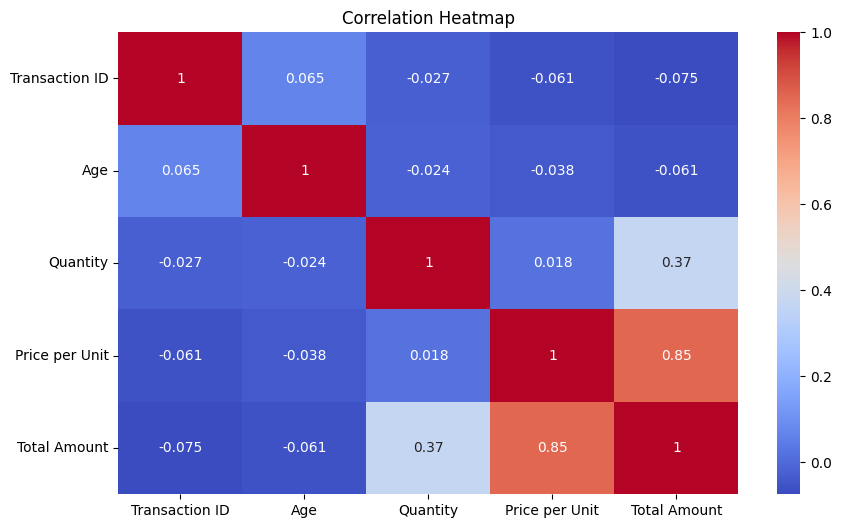

In [11]:
# Step 6: Visualizations
# Correlation heatmap
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [12]:
# Step 7: Recommendations
# Based on the insights, summarize actionable recommendations here
print("\nRecommendations:")
print("1. Focus on top-performing products to maximize revenue.")
print("2. Address seasonal trends in sales by increasing stock during peak times.")
print("3. Improve customer targeting using demographic insights.")


Recommendations:
1. Focus on top-performing products to maximize revenue.
2. Address seasonal trends in sales by increasing stock during peak times.
3. Improve customer targeting using demographic insights.
